In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?select=train')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurav065
Your Kaggle Key: ··········


100%|██████████| 1.98G/1.98G [00:50<00:00, 42.1MB/s]


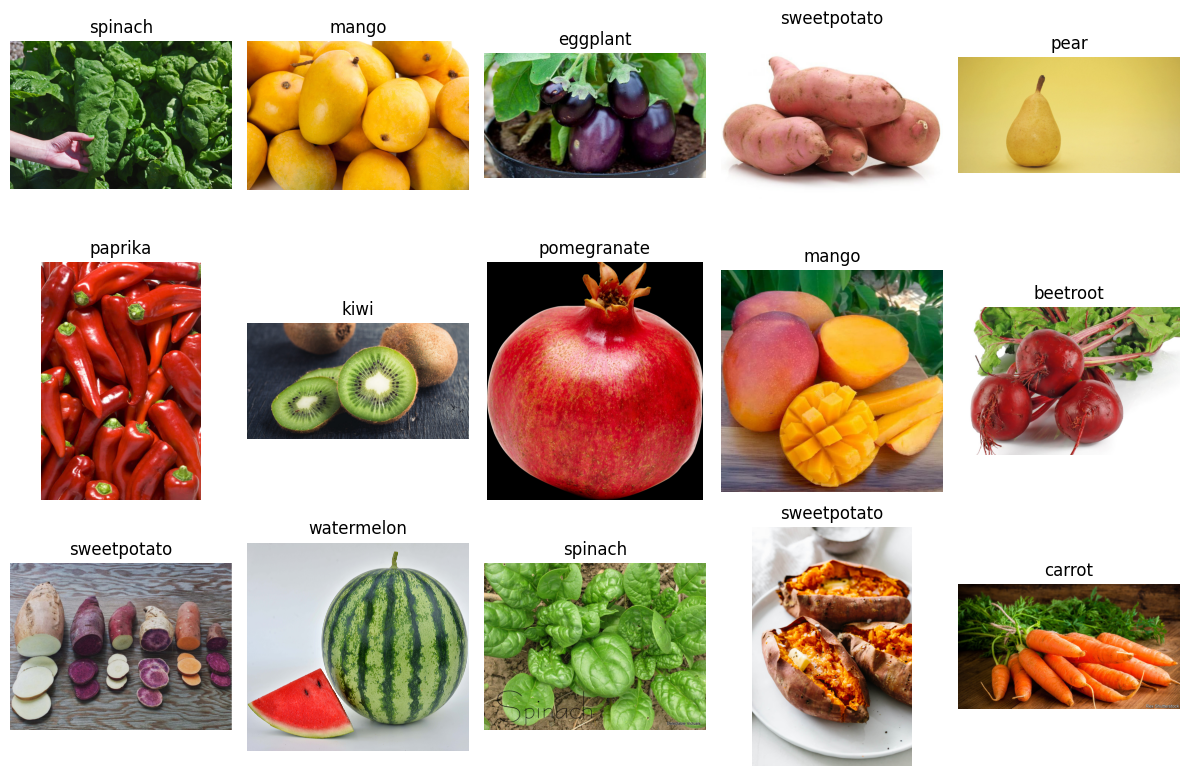

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Specify the path to your image directory
image_dir = '/content/fruit-and-vegetable-image-recognition/train'

# Retrieve all image paths recursively from the directory
image_paths = glob.glob(image_dir + '/**/*.jpg', recursive=True)

# Select a subset of images to display
num_images = 15
selected_images = np.random.choice(image_paths, num_images, replace=False)

# Create a grid plot to display the images
rows = 3  # Number of rows in the grid
cols = 5  # Number of columns in the grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Iterate over the selected images and display them on the grid
for i, image_path in enumerate(selected_images):
    row = i // cols
    col = i % cols
    img = plt.imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    # Extract the subfolder name from the image path
    subfolder = os.path.basename(os.path.dirname(image_path))

    # Set the subfolder name as the subplot title
    axes[row, col].set_title(subfolder)

# Adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()


# Splitting and Making the Training testing and validation directories using the tensorflow keras version of image handling

In [9]:
train_dir = "/content/fruit-and-vegetable-image-recognition/train"
test_dir = "/content/fruit-and-vegetable-image-recognition/test"
validation_dir = "/content/fruit-and-vegetable-image-recognition/validation"

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
img_width,img_height =150,150
input_shape=(img_width,img_height,3)
batch_size =64
train_set =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_set=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)
validation_set = test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


# Using a Cnn architecture

In [11]:
from keras import Model
from keras import optimizers
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3, padding = 'same', activation='relu',input_shape = (150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=3, padding = 'same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=3, padding = 'same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=3, padding = 'same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=3, padding = 'same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
# model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('weights.{epoch:02d}.h5', save_weights_only=True)

# Compile and train your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_set, validation_data = validation_set, epochs=10, callbacks=[checkpoint_callback])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 179s 3s/step - loss: 3.5844 - accuracy: 0.0283 - val_loss: 3.5841 - val_accuracy: 0.0279
Epoch 2/10
49/49 [==============================] - 155s 3s/step - loss: 3.5819 - accuracy: 0.0241 - val_loss: 3.5872 - val_accuracy: 0.0279
Epoch 3/10
49/49 [==============================] - 157s 3s/step - loss: 3.5814 - accuracy: 0.0283 - val_loss: 3.5857 - val_accuracy: 0.0279
Epoch 4/10
49/49 [==============================] - 154s 3s/step - loss: 3.5797 - accuracy: 0.0283 - val_loss: 3.5858 - val_accuracy: 0.0279
Epoch 5/10
49/49 [==============================] - 155s 3s/step - loss: 3.5803 - accuracy: 0.0315 - val_loss: 3.5859 - val_accuracy: 0.0279
Epoch 6/10
21/49 [===========>..................] - ETA: 1:17 - loss: 3.5794 - accuracy: 0.0283